In [1]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.__version__

'3.1.1'

In [2]:
import pandas as pd

pd.__version__

'0.24.2'

In [3]:
import folium
from folium import Map
from folium.plugins import HeatMap

folium.__version__

'0.10.0'

In [4]:
import matplotlib.font_manager as fm

[font for font in fm.fontManager.ttflist if 'Noto' in font.name]

[<Font 'Noto Nastaliq Urdu' (NotoNastaliq.ttc) normal normal 400 normal>,
 <Font 'Noto Sans CJK KR' (NotoSansCJKkr-Regular.otf) normal normal regular normal>,
 <Font 'Noto Sans CJK KR' (NotoSansCJKkr-Thin.otf) normal normal 400 normal>,
 <Font 'Noto Sans CJK KR' (NotoSansCJKkr-Light.otf) normal normal light normal>,
 <Font 'Noto Sans CJK KR' (NotoSansCJKkr-Medium.otf) normal normal medium normal>,
 <Font 'Noto Sans CJK KR' (NotoSansCJKkr-DemiLight.otf) normal normal light normal>,
 <Font 'Noto Sans CJK KR' (NotoSansCJKkr-Black.otf) normal normal black normal>,
 <Font 'Noto Sans Mono CJK KR' (NotoSansMonoCJKkr-Bold.otf) normal normal bold normal>,
 <Font 'Noto Sans Mono CJK KR' (NotoSansMonoCJKkr-Regular.otf) normal normal regular normal>,
 <Font 'Noto Sans CJK KR' (NotoSansCJKkr-Bold.otf) normal normal bold normal>]

In [5]:
plt.rcParams['font.family'] = 'Noto Sans CJK KR'

전국동물보호센터정보표준데이터

<https://www.data.go.kr/dataset/15025454/standard.do>

In [6]:
df = pd.read_csv('data/animal.csv', encoding='euc-kr')

df.columns

Index(['동물보호센터명', '관리기관명', '동물보호센터유형', '구조대상동물', '소재지도로명주소', '소재지지번주소', '위도',
       '경도', '동물보호센터지정일자', '평일운영시작시각', '평일운영종료시각', '평일분양시작시각', '평일분양종료시각',
       '주말운영시작시각', '주말운영종료시각', '주말분양시작시각', '주말분양종료시각', '휴무일', '수의사인원수',
       '사양관리사인원수', '진료실수', '사육실수', '격리실수', '사료보관실수', '구조운반용차량보유대수', '전화번호',
       '데이터기준일자', '제공기관코드', '제공기관명', 'Unnamed: 29'],
      dtype='object')

In [7]:
df.shape

(188, 30)

In [8]:
df.head()

,동물보호센터명,관리기관명,동물보호센터유형,구조대상동물,소재지도로명주소,소재지지번주소,위도,경도,동물보호센터지정일자,평일운영시작시각,...,진료실수,사육실수,격리실수,사료보관실수,구조운반용차량보유대수,전화번호,데이터기준일자,제공기관코드,제공기관명,Unnamed: 29
0,인천수의사회 유기동물보호소,인천수의사회,법인,「동물보호법」에 따른 유실·유기동물,인천광역시 계양구 다남로165번길 56(다남동),NaN,37.566196,126.719630,2006-10-18,09:00,...,NaN,NaN,NaN,NaN,NaN,032-515-7567,2018-08-13,3520000,인천광역시 연수구,NaN
1,사단법인 한국동물구조관리협회,도봉구청,법인,유실·유기 및 피학대동물,경기도 양주시 남면 감악산로 63-37,NaN,37.870072,126.983225,2014-06-10,09:00,...,1.0,6.0,2.0,1.0,5.0,031-867-9119,2018-01-02,3090000,서울특별시 도봉구,NaN
2,수성동물병원,화성시,개인,"개, 고양이",경기도 화성시 남양읍 남양성지로34,경기도 화성시 남양읍 남양리 465-3번지,37.205577,126.807191,2016-12-31,09:00,...,1.0,2.0,1.0,1.0,2.0,031-355-5883,2017-11-17,5530000,경기도 화성시,NaN
3,청산동물병원,화성시,개인,"개, 고양이",경기도 화성시 우정읍 3.1만세로29,경기도 화성시 우정읍 조암리 348번지,37.082177,126.817192,2016-12-31,09:00,...,1.0,1.0,1.0,1.0,1.0,031-358-4358,2017-11-17,5530000,경기도 화성시,NaN
4,인천광역시수의사회유기동물보호소,인천시수의사회,단체,"유기, 유실동물",인천광역시 계양구 다남로165번길 56(다남동),인천광역시 계양구 다남동 35-8,37.566196,126.719630,2007-01-01,09:00,...,1.0,22.0,1.0,2.0,2.0,032-515-7567,2018-08-08,3530000,인천광역시 남동구,NaN


In [9]:
df.isnull().sum()

동물보호센터명          0
관리기관명            0
동물보호센터유형         0
구조대상동물           0
소재지도로명주소         4
소재지지번주소         30
위도               0
경도               0
동물보호센터지정일자       0
평일운영시작시각         0
평일운영종료시각         0
평일분양시작시각        39
평일분양종료시각        39
주말운영시작시각        69
주말운영종료시각        69
주말분양시작시각        84
주말분양종료시각        84
휴무일              0
수의사인원수           0
사양관리사인원수         0
진료실수            45
사육실수            39
격리실수            39
사료보관실수          43
구조운반용차량보유대수     36
전화번호             0
데이터기준일자          0
제공기관코드           0
제공기관명            0
Unnamed: 29    188
dtype: int64

In [10]:
simple_df = df.drop(columns=[
    '소재지지번주소', '동물보호센터지정일자',
    '평일운영시작시각', '평일운영종료시각', '평일분양시작시각', '평일분양종료시각',
    '주말운영시작시각', '주말운영종료시각', '주말분양시작시각', '주말분양종료시각',
    '휴무일', '수의사인원수', '사양관리사인원수',
    '진료실수', '사육실수', '격리실수', '사료보관실수', '구조운반용차량보유대수',
    '데이터기준일자', '제공기관코드', '제공기관명', 'Unnamed: 29'
])

simple_df.head()

,동물보호센터명,관리기관명,동물보호센터유형,구조대상동물,소재지도로명주소,위도,경도,전화번호
0,인천수의사회 유기동물보호소,인천수의사회,법인,「동물보호법」에 따른 유실·유기동물,인천광역시 계양구 다남로165번길 56(다남동),37.566196,126.719630,032-515-7567
1,사단법인 한국동물구조관리협회,도봉구청,법인,유실·유기 및 피학대동물,경기도 양주시 남면 감악산로 63-37,37.870072,126.983225,031-867-9119
2,수성동물병원,화성시,개인,"개, 고양이",경기도 화성시 남양읍 남양성지로34,37.205577,126.807191,031-355-5883
3,청산동물병원,화성시,개인,"개, 고양이",경기도 화성시 우정읍 3.1만세로29,37.082177,126.817192,031-358-4358
4,인천광역시수의사회유기동물보호소,인천시수의사회,단체,"유기, 유실동물",인천광역시 계양구 다남로165번길 56(다남동),37.566196,126.719630,032-515-7567


In [11]:
data = simple_df['동물보호센터명'].value_counts().nlargest(20)

pd.DataFrame(data)

,동물보호센터명
(사)한국동물구조관리협회,6
한국동물구조관리협회,4
누리동물보호센터,3
울산유기동물보호센터,3
부산동물보호센터,3
사단법인 한국동물구조관리협회,3
(사)유기동물 및 동물보호 관리협회,2
백마동물병원,2
임시동물보호소,2
가정동물병원,2


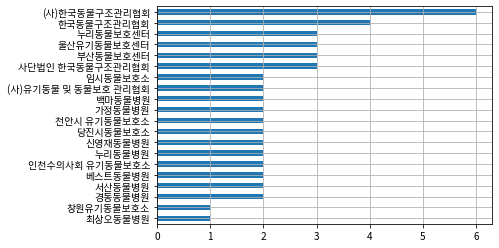

In [12]:
data = simple_df['동물보호센터명'].value_counts().nlargest(20)

data.sort_values().plot.barh(grid=True)

plt.show()

In [13]:
seoul_df = simple_df[simple_df['관리기관명'].str.contains('서울')]

seoul_df[['동물보호센터명', '관리기관명', '소재지도로명주소']]

,동물보호센터명,관리기관명,소재지도로명주소
39,(사)동물구조관리협회,서울특별시 송파구청,경기도 양주시 남면 감악산로 63-37
61,한국동물구조관리협회,서울특별시 광진구청,경기도 양주시 남면 감악산로 63-37
69,동물구조관리협회,서울특별시 노원구청,경기도 양주시 남면 감악산로 63-37
97,(사단)한국동물구조관리협회,서울특별시 서대문구청,경기도 양주시 남면 감악산로 63-37
116,사단법인 한국동물구조관리협회,서울특별시강서구청,경기도 양주시 남면 감악산로 63-37
121,러브펫종합동물병원,서울특별시 관악구청,서울특별시 관악구 남부순환로 1451
154,(사)한국동물구조관리협회,서울특별시 영등포구청,경기도 양주시 남면 감악산로 63-37
168,(사)한국동물구조관리협회,서울특별시 강남구청,경기도 양주시 남면 감악산로 63-37
173,강현림동물병원,서울특별시 양천구청,서울특별시 양천구 등촌로 160
174,(사)한국동물구조관리협회,서울특별시 은평구청,경기도 양주시 남면 감악산로 63-37(상수리)


In [14]:
map = Map(location=[36.5, 127.5], zoom_start=7)

data = simple_df[['위도', '경도']].groupby(['위도', '경도']).sum().reset_index().values.tolist()

HeatMap(data=data, radius=20).add_to(map)

for lat, lng in data:
    marker = folium.Circle(
        location=[lat, lng],
        radius=500,
        weight=1,
        fill_color='#F00',
        fill_opacity=0.3,
    )
    marker.add_to(map)

map